In [1]:
import pandas as pd

# Define the file path
file_path = "data/cleaned_itineraries.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,9527043c91ff2d53cd99405c702f9c69,2022-04-16,2022-04-17,DFW,ATL,U00YXS2,PT2H14M,0.0,False,False,...,1650241320,2022-04-17T20:22:00.000-04:00,ATL,DFW,Frontier Airlines,F9,Unknown,8040,725,coach
1,aacf47e534086aba832da71665abe31f,2022-04-16,2022-04-17,DFW,ATL,VNR,PT2H,1.0,False,False,...,1650257940,2022-04-18T00:59:00.000-04:00,ATL,DFW,Spirit Airlines,NK,AIRBUS INDUSTRIE A321 SHARKLETS,7200,Unknown,coach
2,cc8ca67c864e64036cdb5f945c71ea88,2022-04-16,2022-04-17,DFW,ATL,V0AHZNN1,PT1H59M,0.0,False,False,...,1650223680,2022-04-17T15:28:00.000-04:00,ATL,DFW,American Airlines,AA,Airbus A320,7140,725,coach
3,74b8aaff63d63fc1b69211fb15b53c98,2022-04-16,2022-04-17,DFW,ATL,V0AHZNN1,PT1H59M,0.0,False,False,...,1650230640,2022-04-17T17:24:00.000-04:00,ATL,DFW,American Airlines,AA,Airbus A321,7140,725,coach
4,31c11d5e820509eae5b11d33eb82755f,2022-04-16,2022-04-17,DFW,ATL,V0AHZNN1,PT2H7M,0.0,False,False,...,1650216420,2022-04-17T13:27:00.000-04:00,ATL,DFW,American Airlines,AA,Airbus A321,7620,725,coach


In [3]:
df['searchDate'] = pd.to_datetime(df['searchDate'], errors='coerce')
df['flightDate'] = pd.to_datetime(df['flightDate'], errors='coerce')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674959 entries, 0 to 5674958
Data columns (total 27 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   legId                              object        
 1   searchDate                         datetime64[ns]
 2   flightDate                         datetime64[ns]
 3   startingAirport                    object        
 4   destinationAirport                 object        
 5   fareBasisCode                      object        
 6   travelDuration                     object        
 7   elapsedDays                        float64       
 8   isBasicEconomy                     bool          
 9   isRefundable                       bool          
 10  isNonStop                          bool          
 11  baseFare                           float64       
 12  totalFare                          float64       
 13  seatsRemaining                     float64       
 14  to

In [9]:
columns_to_drop = [
    'seatsRemaining', 'totalFare', 'isRefundable', 'isNonStop', 'legId', 'fareBasisCode', 'segmentsDepartureTimeRaw', 'segmentsArrivalTimeRaw',
    'segmentsEquipmentDescription', 'segmentsDepartureTimeEpochSeconds', 'segmentsArrivalTimeEpochSeconds'
]
df = df.drop(columns=columns_to_drop)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674959 entries, 0 to 5674958
Data columns (total 16 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   searchDate                    datetime64[ns]
 1   flightDate                    datetime64[ns]
 2   startingAirport               object        
 3   destinationAirport            object        
 4   travelDuration                object        
 5   elapsedDays                   float64       
 6   isBasicEconomy                bool          
 7   baseFare                      float64       
 8   totalTravelDistance           float64       
 9   segmentsArrivalAirportCode    object        
 10  segmentsDepartureAirportCode  object        
 11  segmentsAirlineName           object        
 12  segmentsAirlineCode           object        
 13  segmentsDurationInSeconds     object        
 14  segmentsDistance              object        
 15  segmentsCabinCode             ob

In [11]:
df['isBasicEconomy'] = df['isBasicEconomy'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674959 entries, 0 to 5674958
Data columns (total 16 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   searchDate                    datetime64[ns]
 1   flightDate                    datetime64[ns]
 2   startingAirport               object        
 3   destinationAirport            object        
 4   travelDuration                object        
 5   elapsedDays                   float64       
 6   isBasicEconomy                int64         
 7   baseFare                      float64       
 8   totalTravelDistance           float64       
 9   segmentsArrivalAirportCode    object        
 10  segmentsDepartureAirportCode  object        
 11  segmentsAirlineName           object        
 12  segmentsAirlineCode           object        
 13  segmentsDurationInSeconds     object        
 14  segmentsDistance              object        
 15  segmentsCabinCode             ob

In [14]:
df['daysUntilFlight'] = (df['flightDate'] - df['searchDate']).dt.days

df['numStops'] = df['segmentsDepartureAirportCode'].apply(lambda x: x.count('||') if isinstance(x, str) else 0)

df['mainAirlineCode'] = df['segmentsAirlineCode'].apply(lambda x: x.split('||')[0] if isinstance(x, str) else "Unknown")



In [16]:
import re

def parse_travel_duration(duration):
    """
    Convert ISO 8601 travel duration (e.g., 'PT2H29M') to total minutes.
    """
    if not isinstance(duration, str):
        return None  # Handle missing or incorrect formats
    
    hours = 0
    minutes = 0
    
    # Extract hours and minutes using regex
    match = re.match(r'PT(?:(\d+)H)?(?:(\d+)M)?', duration)
    if match:
        if match.group(1):  # If hours exist
            hours = int(match.group(1))
        if match.group(2):  # If minutes exist
            minutes = int(match.group(2))
    
    return hours * 60 + minutes

# Apply the function to convert travelDuration to total minutes
df['travelDurationMinutes'] = df['travelDuration'].apply(parse_travel_duration)

# Check the results
print(df[['travelDuration', 'travelDurationMinutes']].head())


  travelDuration  travelDurationMinutes
0        PT2H14M                    134
1           PT2H                    120
2        PT1H59M                    119
3        PT1H59M                    119
4         PT2H7M                    127


In [ ]:
df = df.drop(columns=['startingAirport'])


In [17]:
df['destinationAirport'], unique_airports = pd.factorize(df['destinationAirport'])

In [ ]:
# Create a mapping dictionary of original airport codes to assigned integer values
destination_airport_mapping = {airport: idx for idx, airport in enumerate(unique_airports)}

# Convert the mapping to a DataFrame for better visualization
mapping_df = pd.DataFrame(list(destination_airport_mapping.items()), columns=['Airport Code', 'Encoded Value'])

# Print the mapping
print(mapping_df)

   Airport Code  Encoded Value
0           ATL              0
1           BOS              1
2           CLT              2
3           DEN              3
4           DTW              4
5           EWR              5
6           IAD              6
7           JFK              7
8           LAX              8
9           LGA              9
10          MIA             10
11          OAK             11
12          ORD             12
13          PHL             13
14          SFO             14


In [21]:
df = df.drop(columns=['startingAirport'])
df = df.drop(columns=['travelDuration'])
df = df.drop(columns=['elapsedDays'])

# Encode 'mainAirlineCode' in-place
df['mainAirlineCode'], unique_airlines = pd.factorize(df['mainAirlineCode'])

# Create a mapping dictionary for reference
airline_code_mapping = {airline: idx for idx, airline in enumerate(unique_airlines)}

# Convert the mapping to a DataFrame for better visualization
mapping_df = pd.DataFrame(list(airline_code_mapping.items()), columns=['Airline Code', 'Encoded Value'])

# Print the mapping
print(mapping_df)


   Airline Code  Encoded Value
0            F9              0
1            NK              1
2            AA              2
3            UA              3
4            DL              4
5            B6              5
6            LF              6
7            KG              7
8            AS              8
9            4B              9
10           SY             10
11           9X             11


In [23]:
import pandas as pd

# Step 1: Count unique airline codes BEFORE extraction
unique_airlines_before = set()
df['segmentsAirlineCode'].dropna().apply(lambda x: unique_airlines_before.update(x.split('||')))
print(f"🔍 Unique Airline Codes BEFORE extraction: {len(unique_airlines_before)}")

# Step 2: Count unique airline codes AFTER extraction
unique_airlines_after = df['mainAirlineCode'].nunique()
print(f"🚀 Unique Airline Codes AFTER extraction: {unique_airlines_after}")

# Step 3: Show the full set of unique airline codes before extraction
print("\n🛫 List of Unique Airline Codes BEFORE extraction:")
print(sorted(unique_airlines_before))


🔍 Unique Airline Codes BEFORE extraction: 13
🚀 Unique Airline Codes AFTER extraction: 12

🛫 List of Unique Airline Codes BEFORE extraction:
['4B', '9K', '9X', 'AA', 'AS', 'B6', 'DL', 'F9', 'KG', 'LF', 'NK', 'SY', 'UA']


In [25]:
# List of columns to drop
columns_to_drop = [
    'segmentsArrivalAirportCode', 
    'segmentsDepartureAirportCode', 
    'segmentsAirlineName', 
    'segmentsAirlineCode', 
    'segmentsDurationInSeconds', 
    'segmentsDistance', 
    'segmentsCabinCode'
]

# Drop the columns
df = df.drop(columns=columns_to_drop)

# Verify the updated DataFrame structure
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674959 entries, 0 to 5674958
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   searchDate             datetime64[ns]
 1   flightDate             datetime64[ns]
 2   destinationAirport     int64         
 3   isBasicEconomy         int64         
 4   baseFare               float64       
 5   totalTravelDistance    float64       
 6   daysUntilFlight        int64         
 7   numStops               int64         
 8   mainAirlineCode        int64         
 9   travelDurationMinutes  int64         
dtypes: datetime64[ns](2), float64(2), int64(6)
memory usage: 433.0 MB
None


In [26]:
df['searchDayOfWeek'] = df['searchDate'].dt.dayofweek  # Monday = 0, Sunday = 6
df['flightDayOfWeek'] = df['flightDate'].dt.dayofweek
df['searchMonth'] = df['searchDate'].dt.month
df['flightMonth'] = df['flightDate'].dt.month
df['searchDay'] = df['searchDate'].dt.day  # Day of the month
df['flightDay'] = df['flightDate'].dt.day
df['searchYear'] = df['searchDate'].dt.year
df['flightYear'] = df['flightDate'].dt.year
df['isSearchWeekend'] = (df['searchDayOfWeek'] >= 5).astype(int)  # 1 if Sat/Sun, else 0
df['isFlightWeekend'] = (df['flightDayOfWeek'] >= 5).astype(int)  

In [28]:
df = df.drop(columns=['searchDate', 'flightDate'])

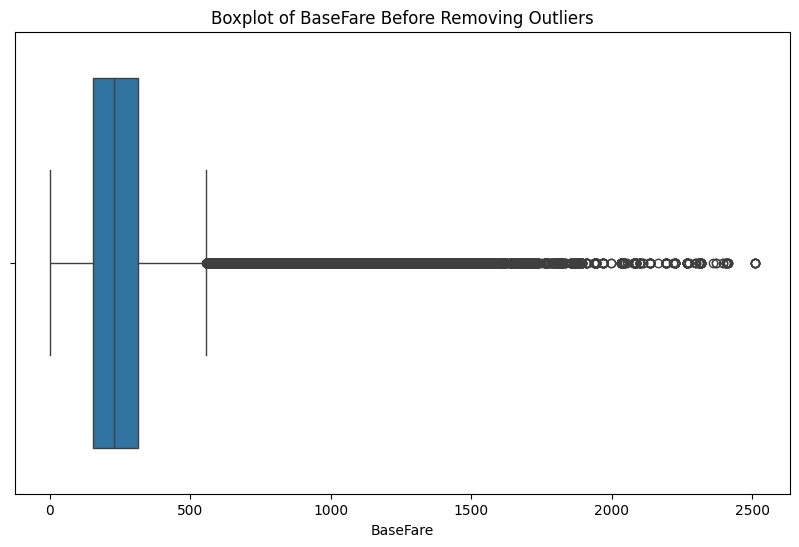

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Plot a boxplot for baseFare
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['baseFare'])
plt.title("Boxplot of BaseFare Before Removing Outliers")
plt.xlabel("BaseFare")
plt.show()

In [40]:
print(f"📉 Min BaseFare: {df['baseFare'].min():.2f}")
print(f"📈 Max BaseFare: {df['baseFare'].max():.2f}")

📉 Min BaseFare: 0.41
📈 Max BaseFare: 2508.84


In [37]:
Q1 = df['baseFare'].quantile(0.25)  # 25th percentile
Q3 = df['baseFare'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range
# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f" Q1 (25th Percentile): {Q1:.2f}")
print(f" Q3 (75th Percentile): {Q3:.2f}")
print(f" IQR (Q3 - Q1): {IQR:.2f}")
print(f" Lower Bound: {lower_bound:.2f}")
print(f" Upper Bound: {upper_bound:.2f}")

 Q1 (25th Percentile): 152.56
 Q3 (75th Percentile): 314.42
 IQR (Q3 - Q1): 161.86
 Lower Bound: -90.23
 Upper Bound: 557.21


In [42]:
# Count the number of rows where baseFare is less than $10
num_rows_below_10 = (df['baseFare'] < 10).sum()

# Print the count before deletion
print(f" Number of rows with baseFare < $10: {num_rows_below_10}")

 Number of rows with baseFare < $10: 49922


In [45]:
df = df[df['baseFare'] >= 10]  # Filter rows
df = df.reset_index(drop=True)  # Reset the index

# Check the new dataset size
print(f"New dataset size: {df.shape[0]} rows")

# Check the updated DataFrame info
print(df.info())

New dataset size: 5625037 rows
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625037 entries, 0 to 5625036
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   destinationAirport     int64  
 1   isBasicEconomy         int64  
 2   baseFare               float64
 3   totalTravelDistance    float64
 4   daysUntilFlight        int64  
 5   numStops               int64  
 6   mainAirlineCode        int64  
 7   travelDurationMinutes  int64  
 8   searchDayOfWeek        int32  
 9   flightDayOfWeek        int32  
 10  searchMonth            int32  
 11  flightMonth            int32  
 12  searchDay              int32  
 13  flightDay              int32  
 14  searchYear             int32  
 15  flightYear             int32  
 16  isSearchWeekend        int64  
 17  isFlightWeekend        int64  
dtypes: float64(2), int32(8), int64(8)
memory usage: 600.8 MB
None


In [46]:
print(f" Min BaseFare: {df['baseFare'].min():.2f}")
print(f" Max BaseFare: {df['baseFare'].max():.2f}")

Q1 = df['baseFare'].quantile(0.25)  # 25th percentile
Q3 = df['baseFare'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range
# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f" Q1 (25th Percentile): {Q1:.2f}")
print(f" Q3 (75th Percentile): {Q3:.2f}")
print(f" IQR (Q3 - Q1): {IQR:.2f}")
print(f" Lower Bound: {lower_bound:.2f}")
print(f" Upper Bound: {upper_bound:.2f}")

 Min BaseFare: 10.00
 Max BaseFare: 2508.84
 Q1 (25th Percentile): 157.21
 Q3 (75th Percentile): 316.28
 IQR (Q3 - Q1): 159.07
 Lower Bound: -81.39
 Upper Bound: 554.88


In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Define features (X_bl) and target (y_bl) for baseline model
X_bl = df.drop(columns=['baseFare'])  # Features
y_bl = df['baseFare']  # Target variable

# Step 2: Split into training (80%) and test (20%) sets with shuffling
X_bl_train, X_bl_test, y_bl_train, y_bl_test = train_test_split(
    X_bl, y_bl, test_size=0.2, random_state=42, shuffle=True
)

# Step 3: Train XGBoost Baseline Model (default parameters)
bl_model = XGBRegressor()  # Default model
bl_model.fit(X_bl_train, y_bl_train)

# Step 4: Predict and Evaluate
y_bl_pred = bl_model.predict(X_bl_test)

# Compute RMSE and R² Score
bl_rmse = np.sqrt(mean_squared_error(y_bl_test, y_bl_pred))
bl_r2 = r2_score(y_bl_test, y_bl_pred)

print(f"✅ Baseline XGBoost Model Performance (With Shuffle Enabled):")
print(f"📉 Baseline RMSE: {bl_rmse:.2f}")
print(f"📈 Baseline R² Score: {bl_r2:.4f}")


✅ Baseline XGBoost Model Performance (With Shuffle Enabled):
📉 Baseline RMSE: 66.98
📈 Baseline R² Score: 0.7586


In [53]:
import pandas as pd
import numpy as np
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Define features (X_best) and target (y_best) for the best model
X_best = df.drop(columns=['baseFare'])  # Features
y_best = df['baseFare']  # Target variable

# Split into training (80%) and test (20%) sets with shuffling
X_best_train, X_best_test, y_best_train, y_best_test = train_test_split(
    X_best, y_best, test_size=0.2, random_state=42, shuffle=True
)

# Step 1: Define the Objective Function for Optimization
def objective(trial):
    # Adjusted hyperparameter search space based on previous Grid Search results
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 400, 600, step=50),  # Around 500
        "max_depth": trial.suggest_int("max_depth", 8, 12),  # Around 10
        "learning_rate": trial.suggest_float("learning_rate", 0.05, 0.15),  # Around 0.1
        "subsample": trial.suggest_float("subsample", 0.9, 1.0),  # Around 1.0
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.8, 1.0),  # Add colsample tuning
        "gamma": trial.suggest_float("gamma", 0, 3),  # Regularization tuning
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
    }

    # Train XGBoost model with suggested parameters
    model = XGBRegressor(**params, random_state=42)
    model.fit(X_best_train, y_best_train)

    # Predict on test set
    y_pred = model.predict(X_best_test)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_best_test, y_pred))

    return rmse  # Minimize RMSE

# Step 2: Run Hyperparameter Optimization (Refined Search Space)
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

# Step 3: Get Best Parameters
best_params = study.best_params
print(f"✅ Best Model Parameters Found: {best_params}")

# Step 4: Train the Best Model with Optimized Parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(X_best_train, y_best_train)

# Step 5: Predict and Evaluate
y_best_pred = best_model.predict(X_best_test)

best_rmse = np.sqrt(mean_squared_error(y_best_test, y_best_pred))
best_r2 = r2_score(y_best_test, y_best_pred)

print(f"✅ Optimized XGBoost Best Model Performance:")
print(f"📉 Best Model RMSE: {best_rmse:.2f}")
print(f"📈 Best Model R² Score: {best_r2:.4f}")

# Compare with Baseline Model
print(f"\n📊 Comparison with Baseline Model:")
print(f"➡️ Baseline RMSE: {bl_rmse:.2f} vs. Best Model RMSE: {best_rmse:.2f}")
print(f"➡️ Baseline R² Score: {bl_r2:.4f} vs. Best Model R² Score: {best_r2:.4f}")

/Users/sujinlee/Desktop/4485-Project---Group-8-/Backend/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-03-19 08:01:10,964] A new study created in memory with name: no-name-fd6ea832-d6cf-428e-bb41-72cbbc0ae5c0
[I 2025-03-19 08:02:08,097] Trial 0 finished with value: 51.451843250290786 and parameters: {'n_estimators': 600, 'max_depth': 10, 'learning_rate': 0.06776828333546092, 'subsample': 0.9117237983083696, 'colsample_bytree': 0.9541222882888295, 'gamma': 2.5213917001680812, 'reg_alpha': 1.3311882665805974, 'reg_lambda': 1.3496631309139202}. Best is trial 0 with value: 51.451843250290786.
[I 2025-03-19 08:02:50,609] Trial 1 finished with value: 50.40111769885502 and parameters: {'n_estimators': 400, 'max_depth': 11, 'learning_rate': 0.08299310569291739, 'subsample': 0.9529731515231524, 'co

✅ Best Model Parameters Found: {'n_estimators': 550, 'max_depth': 12, 'learning_rate': 0.12852050048507288, 'subsample': 0.9892693180540902, 'colsample_bytree': 0.8736773028618495, 'gamma': 0.8054662702137714, 'reg_alpha': 4.471414339809618, 'reg_lambda': 4.457712212903973}
✅ Optimized XGBoost Best Model Performance:
📉 Best Model RMSE: 45.12
📈 Best Model R² Score: 0.8905

📊 Comparison with Baseline Model:
➡️ Baseline RMSE: 66.98 vs. Best Model RMSE: 45.12
➡️ Baseline R² Score: 0.7586 vs. Best Model R² Score: 0.8905


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625037 entries, 0 to 5625036
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   destinationAirport     int64  
 1   isBasicEconomy         int64  
 2   baseFare               float64
 3   totalTravelDistance    float64
 4   daysUntilFlight        int64  
 5   numStops               int64  
 6   mainAirlineCode        int64  
 7   travelDurationMinutes  int64  
 8   searchDayOfWeek        int32  
 9   flightDayOfWeek        int32  
 10  searchMonth            int32  
 11  flightMonth            int32  
 12  searchDay              int32  
 13  flightDay              int32  
 14  searchYear             int32  
 15  flightYear             int32  
 16  isSearchWeekend        int64  
 17  isFlightWeekend        int64  
dtypes: float64(2), int32(8), int64(8)
memory usage: 600.8 MB


In [55]:
# Assuming your DataFrame is named 'df'
avg_base_fare = df['baseFare'].mean()

# Print the result
print(f"The average base fare is: {avg_base_fare}")

The average base fare is: 250.072963528951


<Figure size 1000x600 with 0 Axes>

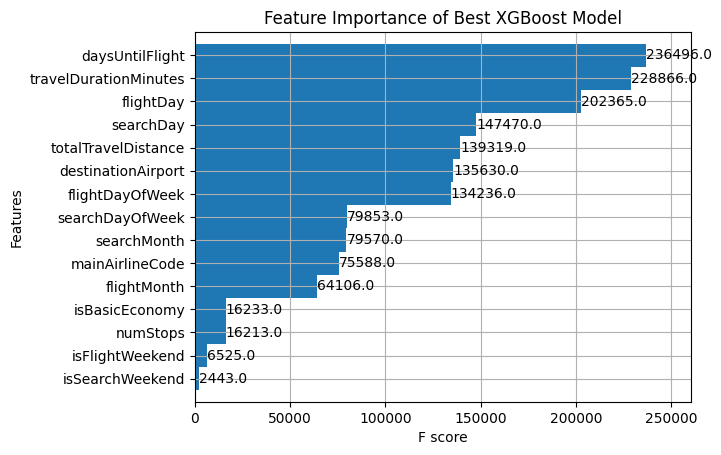

In [56]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Step 6: Plot the Feature Importance
plt.figure(figsize=(10, 6))
plot_importance(best_model, importance_type='weight', height=1)  # You can set height to 1 for taller bars
plt.title("Feature Importance of Best XGBoost Model")
plt.show()


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625037 entries, 0 to 5625036
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   destinationAirport     int64  
 1   isBasicEconomy         int64  
 2   baseFare               float64
 3   totalTravelDistance    float64
 4   daysUntilFlight        int64  
 5   numStops               int64  
 6   mainAirlineCode        int64  
 7   travelDurationMinutes  int64  
 8   searchDayOfWeek        int32  
 9   flightDayOfWeek        int32  
 10  searchMonth            int32  
 11  flightMonth            int32  
 12  searchDay              int32  
 13  flightDay              int32  
 14  searchYear             int32  
 15  flightYear             int32  
 16  isSearchWeekend        int64  
 17  isFlightWeekend        int64  
dtypes: float64(2), int32(8), int64(8)
memory usage: 600.8 MB


In [59]:
import pandas as pd

# Step 1: Filter direct flights only (numStops == 0)
direct_flights = df[df['numStops'] == 0]

# Step 2: Lookup table for average direct flight distance
distance_lookup = (
    direct_flights
    .groupby('destinationAirport')['totalTravelDistance']
    .mean()
    .reset_index()
    .rename(columns={
        'totalTravelDistance': 'avgDirectFlightDistance'
    })
)

# Step 3: Lookup table for average direct flight duration
duration_lookup = (
    direct_flights
    .groupby('destinationAirport')['travelDurationMinutes']
    .mean()
    .reset_index()
    .rename(columns={
        'travelDurationMinutes': 'avgDirectFlightDurationMinutes'
    })
)

# Step 4: Sort both tables (optional)
distance_lookup = distance_lookup.sort_values('destinationAirport')
duration_lookup = duration_lookup.sort_values('destinationAirport')

# Step 5: Print both tables
print("=== Average Direct Flight Distance Lookup ===")
print(distance_lookup)

print("\n=== Average Direct Flight Duration Lookup ===")
print(duration_lookup)


=== Average Direct Flight Distance Lookup ===
    destinationAirport  avgDirectFlightDistance
0                    0               761.604314
1                    1              1555.589936
2                    2               933.358077
3                    3               654.216872
4                    4              1041.473602
5                    5              1380.356216
6                    6              1179.012079
7                    7              1380.614170
8                    8              1265.612072
9                    9              1382.985633
10                  10              1169.094117
11                  12               841.033081
12                  13              1313.713160
13                  14              1468.000000

=== Average Direct Flight Duration Lookup ===
    destinationAirport  avgDirectFlightDurationMinutes
0                    0                      129.205875
1                    1                      224.557662
2                    2

In [60]:
# Save distance lookup table
distance_lookup.to_csv("data/distance_lookup.csv", index=False)

# Save duration lookup table
duration_lookup.to_csv("data/duration_lookup.csv", index=False)


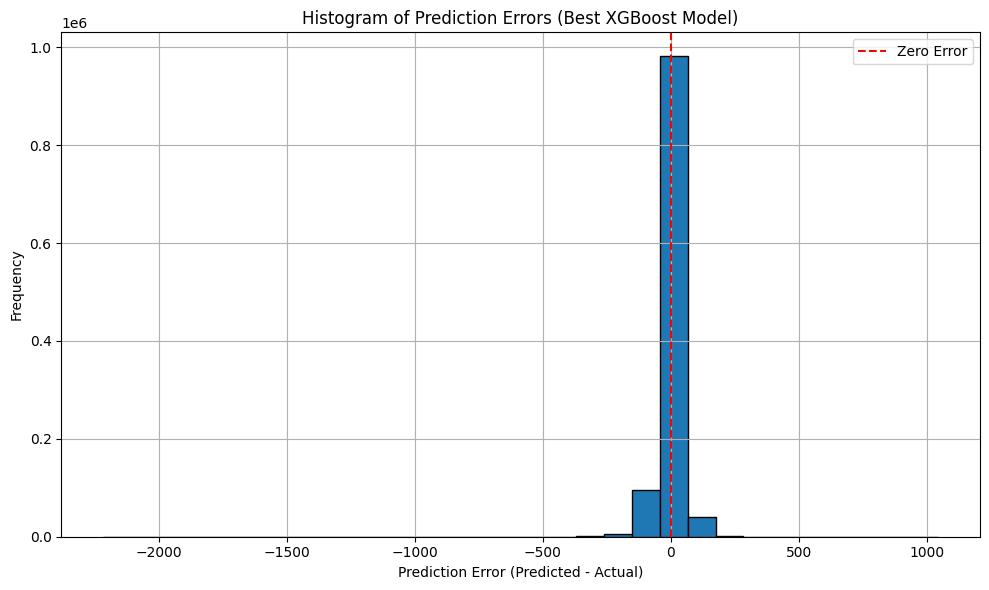

In [63]:
import matplotlib.pyplot as plt

# Calculate prediction errors
errors = y_best_pred - y_best_test  # You can also try absolute errors: np.abs(y_best_pred - y_best_test)

# Plot histogram of errors
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, edgecolor='black')
plt.title("Histogram of Prediction Errors (Best XGBoost Model)")
plt.xlabel("Prediction Error (Predicted - Actual)")
plt.ylabel("Frequency")
plt.grid(True)
plt.axvline(0, color='red', linestyle='dashed', linewidth=1.5, label='Zero Error')
plt.legend()
plt.tight_layout()
plt.show()


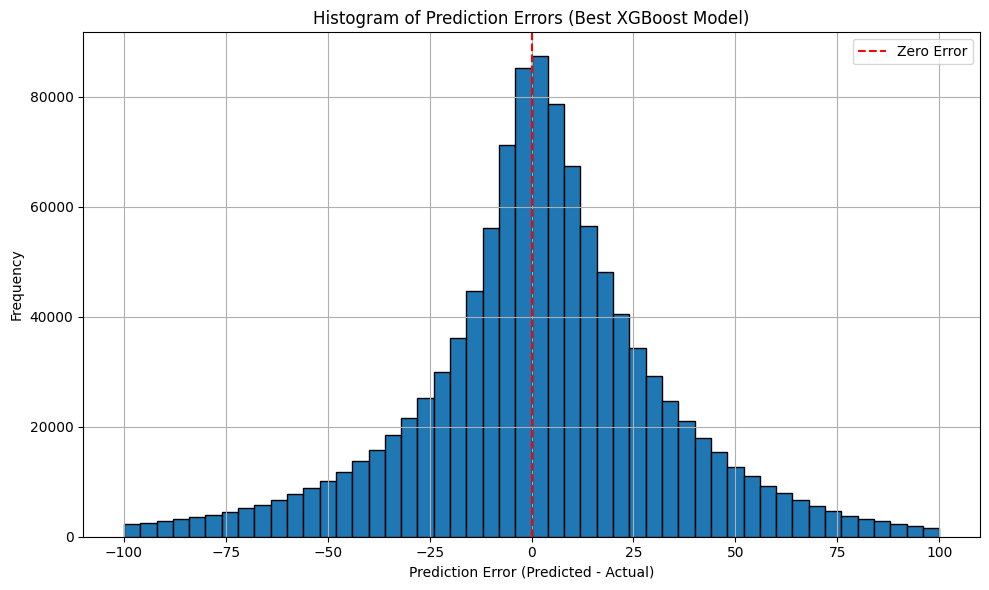

In [65]:
import matplotlib.pyplot as plt

# Calculate prediction errors
errors = y_best_pred - y_best_test  # You can also try absolute errors: np.abs(y_best_pred - y_best_test)

# Plot histogram of errors
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, range=(-100, 100), edgecolor='black')
plt.title("Histogram of Prediction Errors (Best XGBoost Model)")
plt.xlabel("Prediction Error (Predicted - Actual)")
plt.ylabel("Frequency")
plt.grid(True)
plt.axvline(0, color='red', linestyle='dashed', linewidth=1.5, label='Zero Error')
plt.legend()
plt.tight_layout()
plt.show()


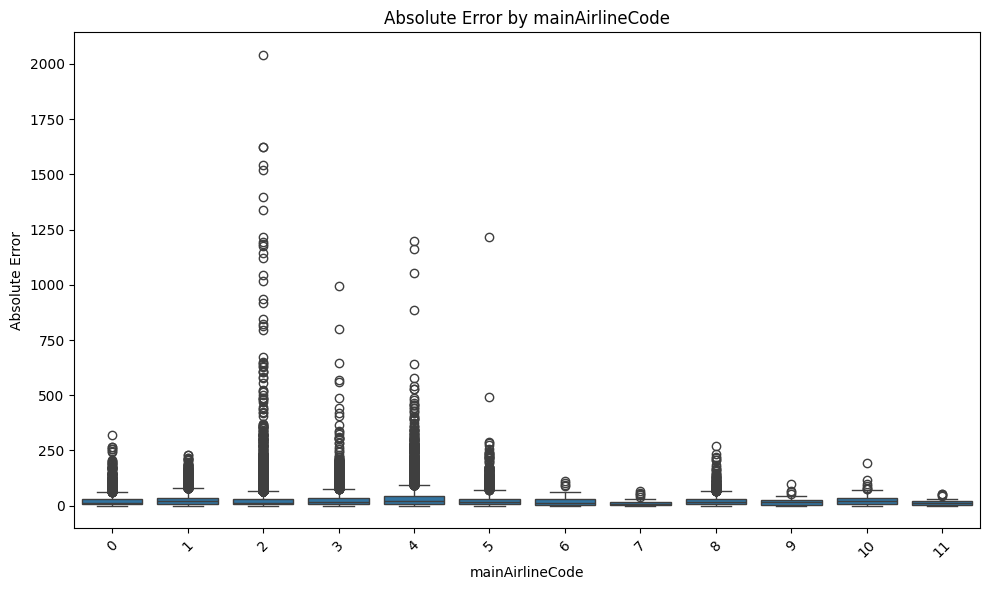

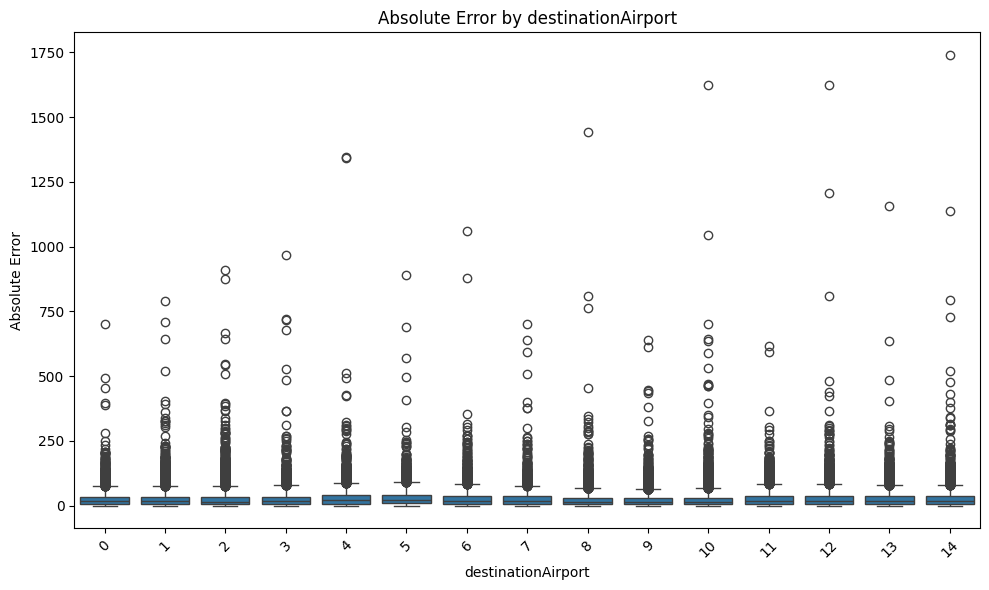

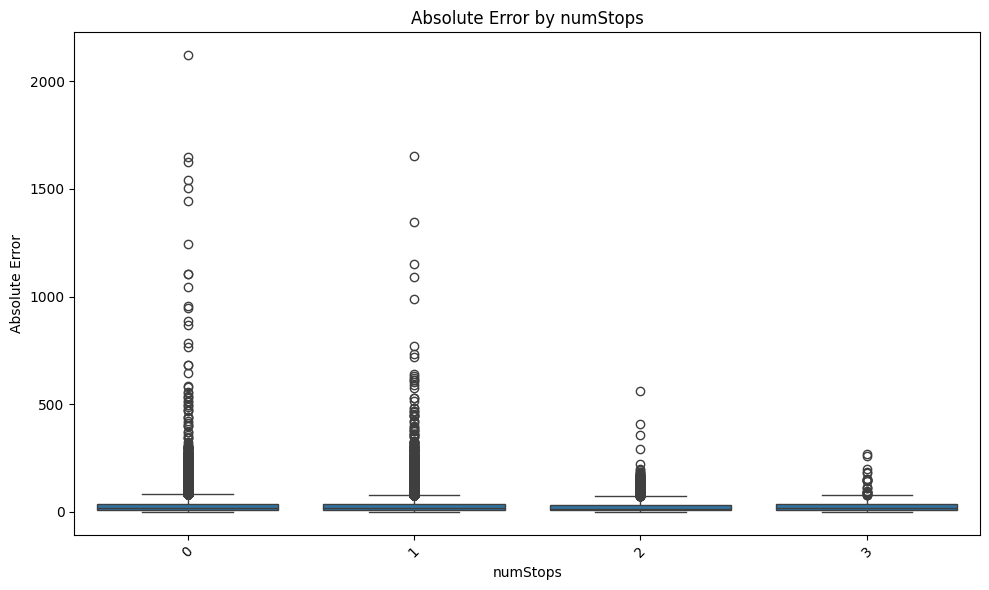

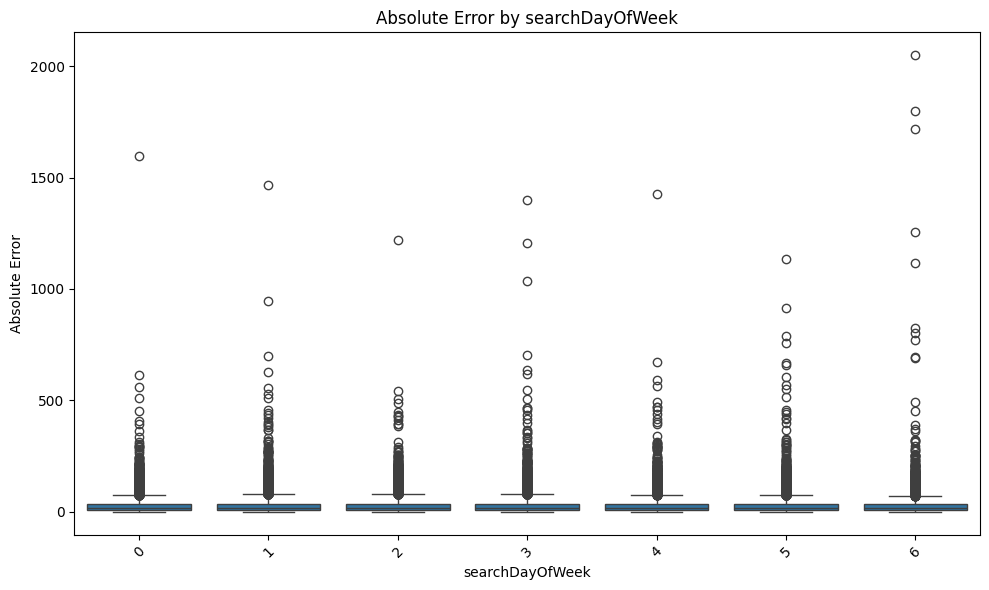

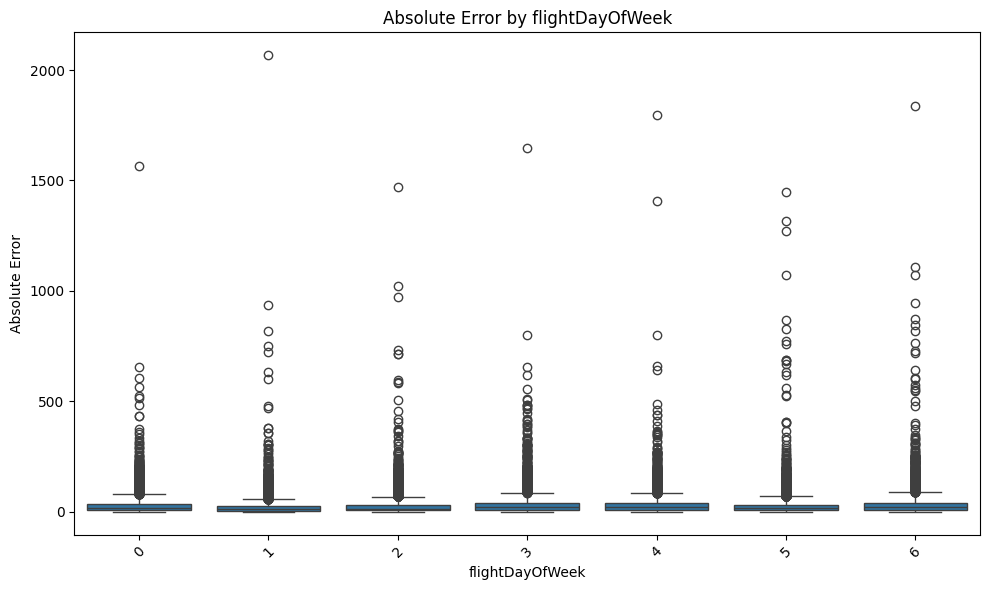

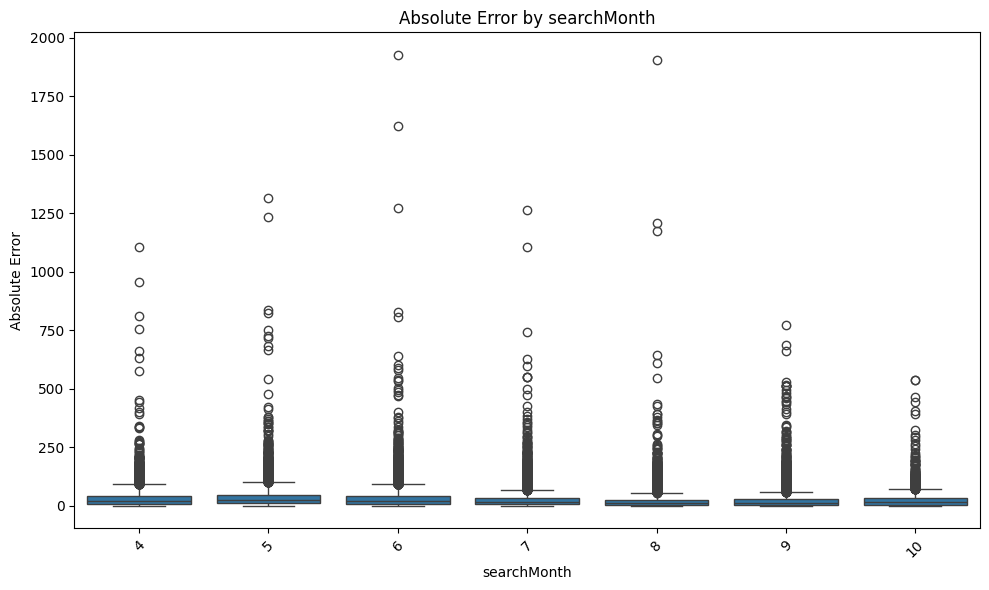

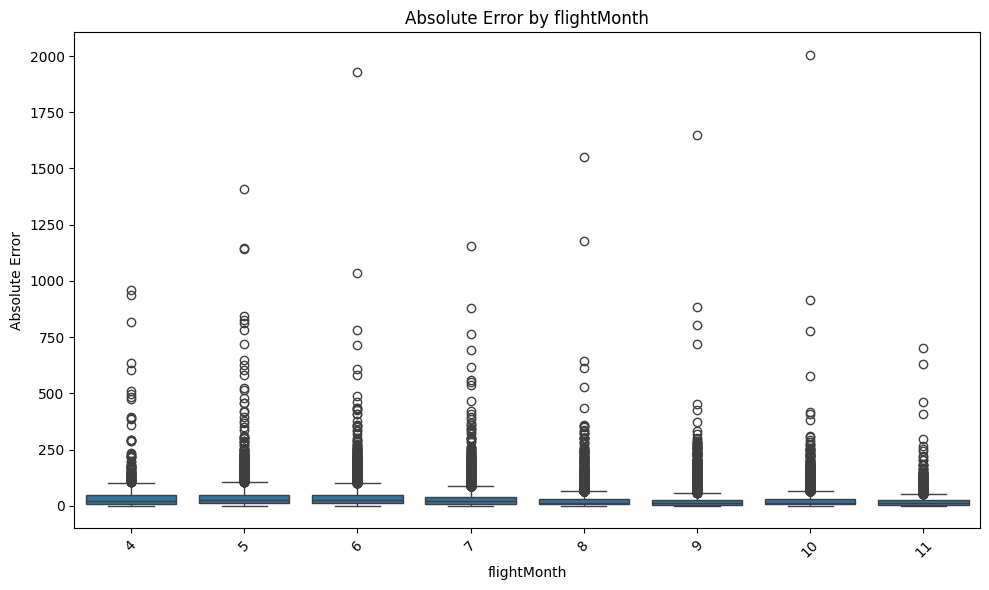

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare error DataFrame
abs_errors = np.abs(y_best_pred - y_best_test)

df_errors = X_best_test.copy()
df_errors['actual'] = y_best_test
df_errors['predicted'] = y_best_pred
df_errors['error'] = df_errors['predicted'] - df_errors['actual']
df_errors['abs_error'] = abs_errors

categorical_features = ['mainAirlineCode', 'destinationAirport', 'numStops', 
                        'searchDayOfWeek', 'flightDayOfWeek', 'searchMonth', 'flightMonth']

for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='abs_error', data=df_errors.sample(100000))  # sample for speed
    plt.title(f"Absolute Error by {col}")
    plt.xlabel(col)
    plt.ylabel("Absolute Error")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



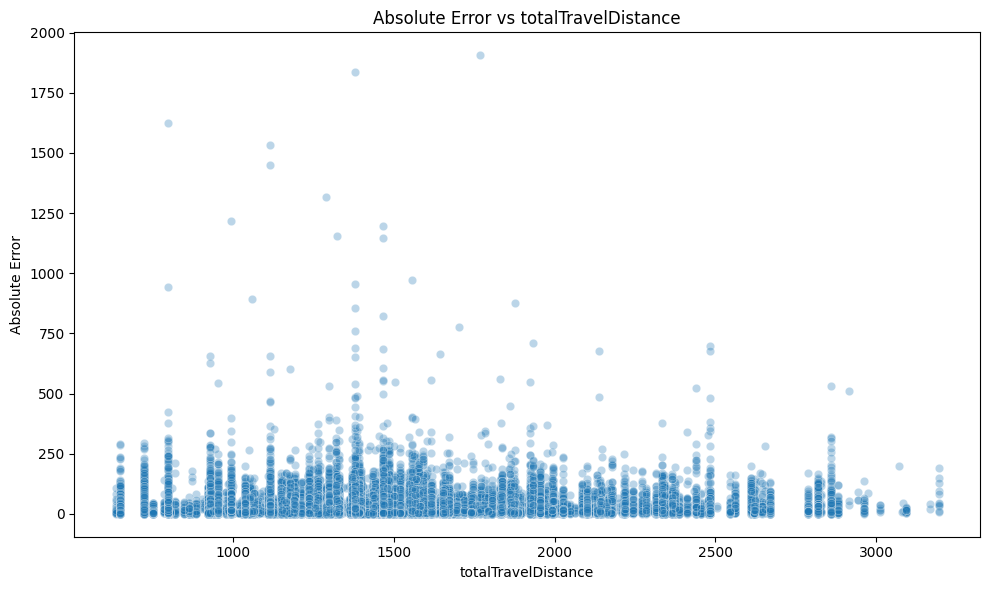

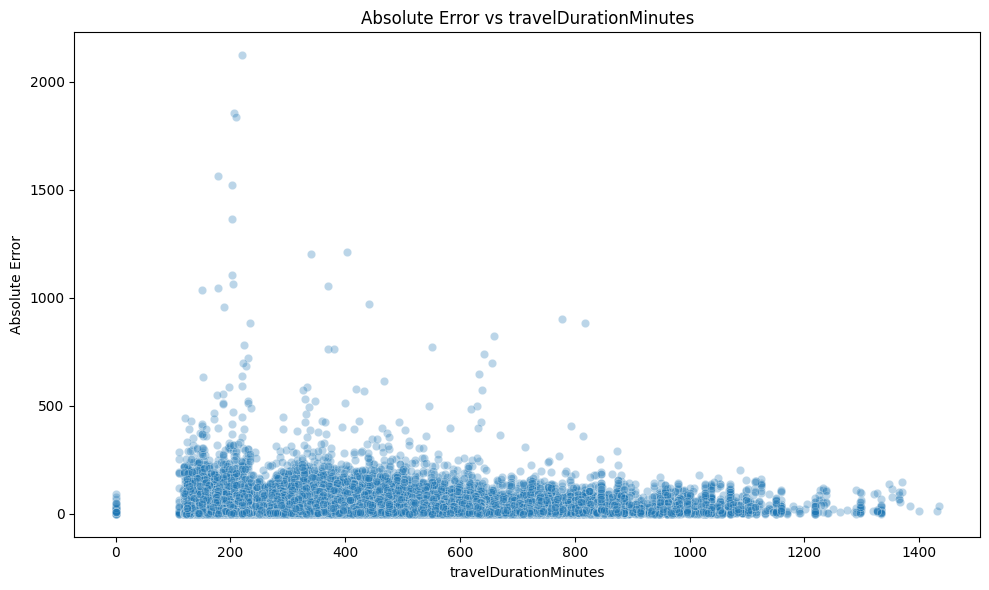

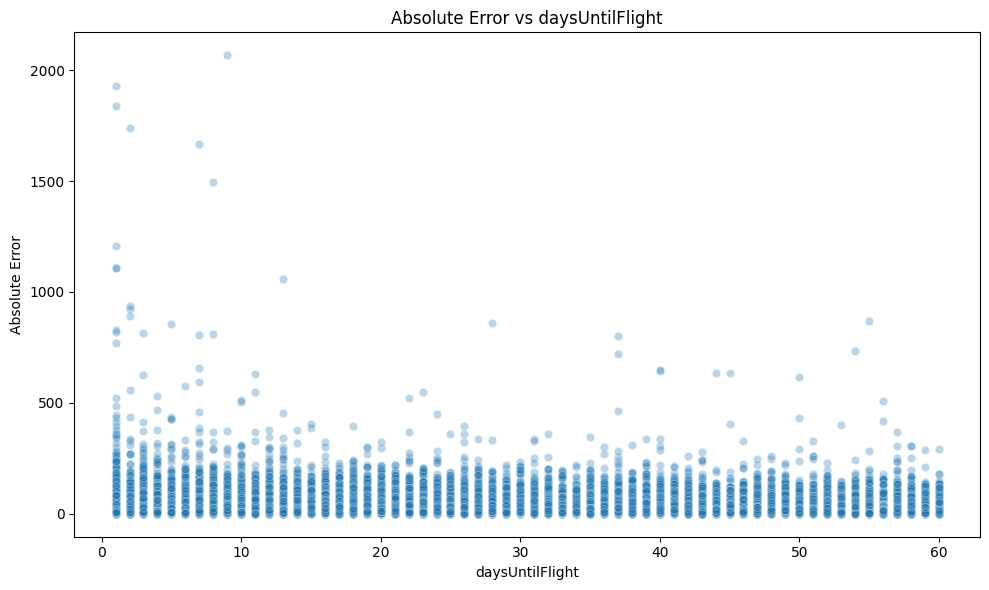

In [73]:
continuous_features = ['totalTravelDistance', 'travelDurationMinutes', 'daysUntilFlight']

for col in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=col, y='abs_error', data=df_errors.sample(100000), alpha=0.3)
    plt.title(f"Absolute Error vs {col}")
    plt.xlabel(col)
    plt.ylabel("Absolute Error")
    plt.tight_layout()
    plt.show()


In [74]:
correlations = df_errors.corr(numeric_only=True)['abs_error'].sort_values(ascending=False)
print("Correlation with Absolute Error:\n", correlations)


Correlation with Absolute Error:
 abs_error                1.000000
actual                   0.350154
predicted                0.242778
flightDayOfWeek          0.046392
mainAirlineCode          0.027783
isFlightWeekend          0.017096
searchDay                0.010561
totalTravelDistance      0.001214
flightDay               -0.000717
destinationAirport      -0.001955
searchDayOfWeek         -0.003753
isSearchWeekend         -0.010345
travelDurationMinutes   -0.026060
numStops                -0.027262
daysUntilFlight         -0.063789
searchMonth             -0.137311
flightMonth             -0.153575
isBasicEconomy          -0.167475
error                   -0.376466
searchYear                    NaN
flightYear                    NaN
Name: abs_error, dtype: float64


In [ ]:
df_errors = X_best_test.copy()
df_errors['actual'] = y_best_test
df_errors['predicted'] = y_best_pred
df_errors['error'] = df_errors['predicted'] - df_errors['actual']
df_errors['abs_error'] = np.abs(df_errors['error'])

# Top 10 largest absolute errors
worst_preds = df_errors.sort_values('abs_error', ascending=False).head(10)
print(worst_preds)




         destinationAirport  isBasicEconomy  totalTravelDistance  \
3562750                   7               0               2219.0   
5537020                   1               0               1556.0   
5503332                   1               0               1556.0   
5049487                   8               0               1238.0   
1746913                   8               0               1238.0   
4483914                   9               0               1380.0   
5427675                   9               0               1380.0   
1676415                   5               0               1380.0   
886799                    9               0               1430.0   
1440619                   6               0               1177.0   

         daysUntilFlight  numStops  mainAirlineCode  travelDurationMinutes  \
3562750                1         1                2                    491   
5537020                8         0                2                    221   
5503332          

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625037 entries, 0 to 5625036
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   destinationAirport     int64  
 1   isBasicEconomy         int64  
 2   baseFare               float64
 3   totalTravelDistance    float64
 4   daysUntilFlight        int64  
 5   numStops               int64  
 6   mainAirlineCode        int64  
 7   travelDurationMinutes  int64  
 8   searchDayOfWeek        int32  
 9   flightDayOfWeek        int32  
 10  searchMonth            int32  
 11  flightMonth            int32  
 12  searchDay              int32  
 13  flightDay              int32  
 14  searchYear             int32  
 15  flightYear             int32  
 16  isSearchWeekend        int64  
 17  isFlightWeekend        int64  
dtypes: float64(2), int32(8), int64(8)
memory usage: 600.8 MB


In [76]:
# Add new column to indicate major airlines
df['isMajorAirline'] = df['mainAirlineCode'].apply(lambda x: 1 if 2 <= x <= 4 else 0)

In [77]:
# Updated features and target
X_best2 = df.drop(columns=['baseFare'])  # Now includes isMajorAirline
y_best2 = df['baseFare']

# Train-test split
X_best2_train, X_best2_test, y_best2_train, y_best2_test = train_test_split(
    X_best2, y_best2, test_size=0.2, random_state=42, shuffle=True
)

# Use the same best_params found earlier
best_model2 = XGBRegressor(**best_params, random_state=42)
best_model2.fit(X_best2_train, y_best2_train)

# Predict and evaluate
y_best2_pred = best_model2.predict(X_best2_test)

best2_rmse = np.sqrt(mean_squared_error(y_best2_test, y_best2_pred))
best2_r2 = r2_score(y_best2_test, y_best2_pred)

print(f"\n✅ `bestmodel2` with `isMajorAirline` Feature:")
print(f"📉 RMSE: {best2_rmse:.2f}")
print(f"📈 R² Score: {best2_r2:.4f}")



✅ `bestmodel2` with `isMajorAirline` Feature:
📉 RMSE: 45.27
📈 R² Score: 0.8897


In [79]:
# Define features and target
X_best2 = df.drop(columns=['baseFare'])
y_best2 = df['baseFare']

# Train-test split
X_best2_train, X_best2_test, y_best2_train, y_best2_test = train_test_split(
    X_best2, y_best2, test_size=0.2, random_state=42, shuffle=True
)

# Best model parameters from Optuna
best_params = {
    'n_estimators': 550,
    'max_depth': 12,
    'learning_rate': 0.12852050048507288,
    'subsample': 0.9892693180540902,
    'colsample_bytree': 0.8736773028618495,
    'gamma': 0.8054662702137714,
    'reg_alpha': 4.471414339809618,
    'reg_lambda': 4.457712212903973
}

# Train bestmodel2
best_model2 = XGBRegressor(**best_params, random_state=42)
best_model2.fit(X_best2_train, y_best2_train)

# Predict and evaluate
y_best2_pred = best_model2.predict(X_best2_test)
best2_rmse = np.sqrt(mean_squared_error(y_best2_test, y_best2_pred))
best2_r2 = r2_score(y_best2_test, y_best2_pred)

# Output results
print("\n✅ BestModel2 with isMajorAirline Feature")
print(f"📉 RMSE: {best2_rmse:.2f}")
print(f"📈 R² Score: {best2_r2:.4f}")


✅ BestModel2 with isMajorAirline Feature
📉 RMSE: 45.27
📈 R² Score: 0.8897


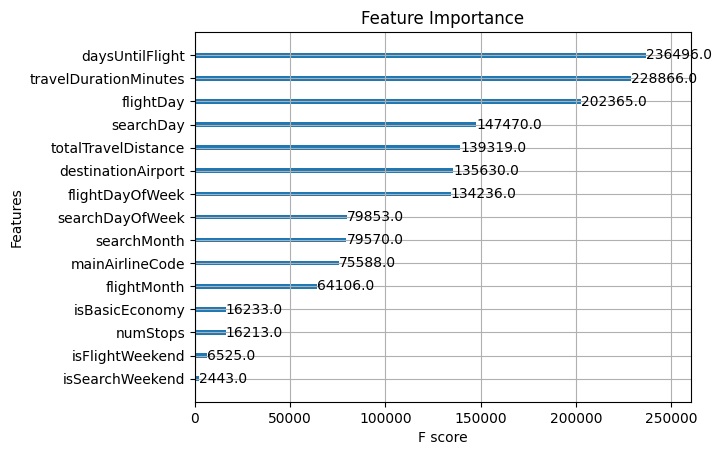

In [82]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(best_model)
plt.title("Feature Importance")
plt.show()


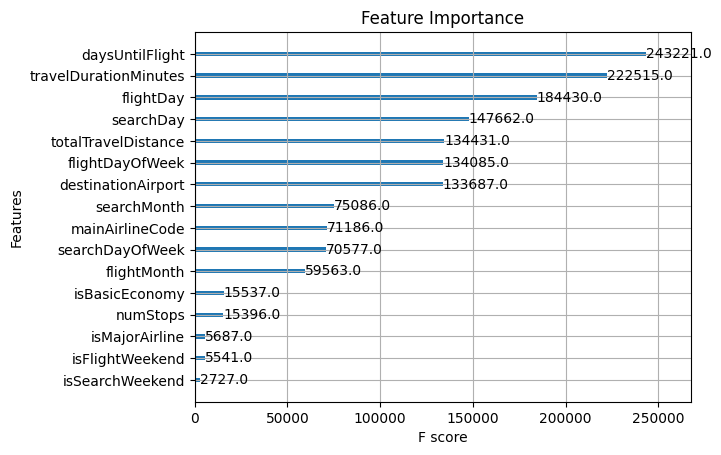

In [83]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(best_model2)
plt.title("Feature Importance")
plt.show()


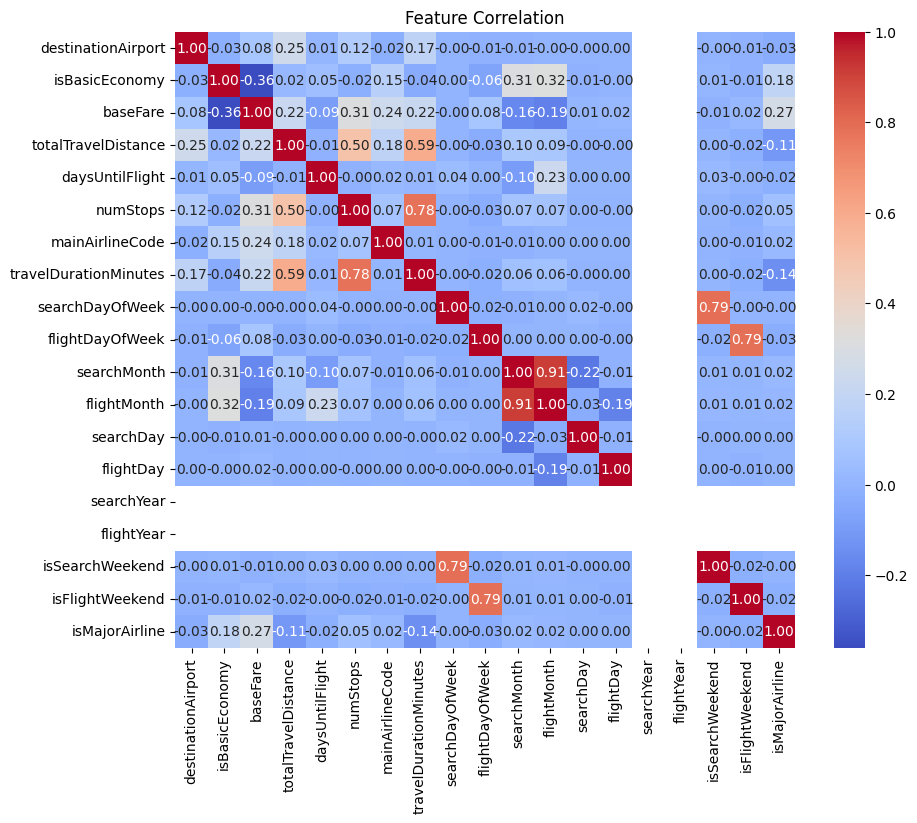

In [84]:
import seaborn as sns

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation")
plt.show()


In [85]:
# 2. Define reduced features
reduced_features = [
    'isBasicEconomy',
    'totalTravelDistance',
    'daysUntilFlight',
    'numStops',
    'travelDurationMinutes',
    'mainAirlineCode',
    'isMajorAirline'
]

X_best3 = df[reduced_features]
y_best3 = df['baseFare']

# 3. Train-test split
X_best3_train, X_best3_test, y_best3_train, y_best3_test = train_test_split(
    X_best3, y_best3, test_size=0.2, random_state=42, shuffle=True
)

# 4. Define Optuna objective
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 600, step=50),
        "max_depth": trial.suggest_int("max_depth", 4, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.05, 0.2),
        "subsample": trial.suggest_float("subsample", 0.8, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.7, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 3),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
    }

    model = XGBRegressor(**params, random_state=42)
    model.fit(X_best3_train, y_best3_train)

    y_pred = model.predict(X_best3_test)
    rmse = np.sqrt(mean_squared_error(y_best3_test, y_pred))
    return rmse

# 5. Run Optuna optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

# 6. Train final model with best params
best_params3 = study.best_params
print(f"✅ BestModel3 Parameters: {best_params3}")

best_model3 = XGBRegressor(**best_params3, random_state=42)
best_model3.fit(X_best3_train, y_best3_train)

# 7. Evaluate model
y_best3_pred = best_model3.predict(X_best3_test)
best3_rmse = np.sqrt(mean_squared_error(y_best3_test, y_best3_pred))
best3_r2 = r2_score(y_best3_test, y_best3_pred)

print("\n✅ Final BestModel3 with Reduced Features + Retuned Hyperparameters")
print(f"📉 RMSE: {best3_rmse:.2f}")
print(f"📈 R² Score: {best3_r2:.4f}")


[I 2025-03-25 21:07:39,747] A new study created in memory with name: no-name-f80231fe-f16f-4205-97d1-49ecf3464e98
[I 2025-03-25 21:08:00,556] Trial 0 finished with value: 79.19060535224986 and parameters: {'n_estimators': 550, 'max_depth': 5, 'learning_rate': 0.18086418054206238, 'subsample': 0.9645792423091829, 'colsample_bytree': 0.8287043506823651, 'gamma': 2.995512540987758, 'reg_alpha': 1.985453331246379, 'reg_lambda': 1.3926633134807143}. Best is trial 0 with value: 79.19060535224986.
[I 2025-03-25 21:08:15,616] Trial 1 finished with value: 79.94586433876654 and parameters: {'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.15140669133745627, 'subsample': 0.9359865608990205, 'colsample_bytree': 0.9097940629621577, 'gamma': 1.8267060222640101, 'reg_alpha': 3.2650913066276215, 'reg_lambda': 1.0256576335395344}. Best is trial 0 with value: 79.19060535224986.
[I 2025-03-25 21:09:03,017] Trial 2 finished with value: 71.97804786702878 and parameters: {'n_estimators': 600, 'max_de

✅ BestModel3 Parameters: {'n_estimators': 600, 'max_depth': 12, 'learning_rate': 0.11740786540635523, 'subsample': 0.9247258997743063, 'colsample_bytree': 0.935336826146174, 'gamma': 1.725243875698535, 'reg_alpha': 1.6269780943760086, 'reg_lambda': 0.6583050373642363}

✅ Final BestModel3 with Reduced Features + Retuned Hyperparameters
📉 RMSE: 71.91
📈 R² Score: 0.7218


In [87]:
# 2. Drop the unwanted columns
X_best4 = df.drop(columns=['baseFare', 'searchYear', 'flightYear', 'isSearchWeekend'])
y_best4 = df['baseFare']

# 3. Split dataset
X_best4_train, X_best4_test, y_best4_train, y_best4_test = train_test_split(
    X_best4, y_best4, test_size=0.2, random_state=42, shuffle=True
)

# 4. Define Optuna objective
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 400, 600, step=50),
        "max_depth": trial.suggest_int("max_depth", 8, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.05, 0.15),
        "subsample": trial.suggest_float("subsample", 0.9, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.8, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 3),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
    }

    model = XGBRegressor(**params, random_state=42)
    model.fit(X_best4_train, y_best4_train)

    y_pred = model.predict(X_best4_test)
    rmse = np.sqrt(mean_squared_error(y_best4_test, y_pred))
    return rmse

# 5. Run Optuna optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

# 6. Train bestmodel4 with optimal params
best_params4 = study.best_params
print(f"✅ BestModel4 Parameters: {best_params4}")

best_model4 = XGBRegressor(**best_params4, random_state=42)
best_model4.fit(X_best4_train, y_best4_train)

# 7. Evaluate
y_best4_pred = best_model4.predict(X_best4_test)
best4_rmse = np.sqrt(mean_squared_error(y_best4_test, y_best4_pred))
best4_r2 = r2_score(y_best4_test, y_best4_pred)

print("\n✅ Final BestModel4 (without isSearchWeekend, searchYear, flightYear)")
print(f"📉 RMSE: {best4_rmse:.2f}")
print(f"📈 R² Score: {best4_r2:.4f}")


[I 2025-03-25 21:35:29,204] A new study created in memory with name: no-name-165a86d4-6faa-47d6-bdc2-80d174a3c293
[I 2025-03-25 21:36:10,153] Trial 0 finished with value: 56.80699990240314 and parameters: {'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.09388387487307556, 'subsample': 0.9712691707817308, 'colsample_bytree': 0.9094980070188495, 'gamma': 2.57493545987751, 'reg_alpha': 2.763795547131345, 'reg_lambda': 0.08292685302805525}. Best is trial 0 with value: 56.80699990240314.
[I 2025-03-25 21:37:13,367] Trial 1 finished with value: 49.506426757790955 and parameters: {'n_estimators': 600, 'max_depth': 10, 'learning_rate': 0.10611547076471094, 'subsample': 0.9063904470217725, 'colsample_bytree': 0.8636889386535106, 'gamma': 1.755627851855569, 'reg_alpha': 1.6033622128074438, 'reg_lambda': 1.5016258140132361}. Best is trial 1 with value: 49.506426757790955.
[I 2025-03-25 21:38:30,867] Trial 2 finished with value: 45.21680810697916 and parameters: {'n_estimators': 550, 'max_

✅ BestModel4 Parameters: {'n_estimators': 550, 'max_depth': 12, 'learning_rate': 0.13714232958922118, 'subsample': 0.954732310741902, 'colsample_bytree': 0.8012441557966767, 'gamma': 2.4661103468573486, 'reg_alpha': 4.048034351116424, 'reg_lambda': 0.44219440503031526}

✅ Final BestModel4 (without isSearchWeekend, searchYear, flightYear)
📉 RMSE: 44.99
📈 R² Score: 0.8911


<Figure size 1000x600 with 0 Axes>

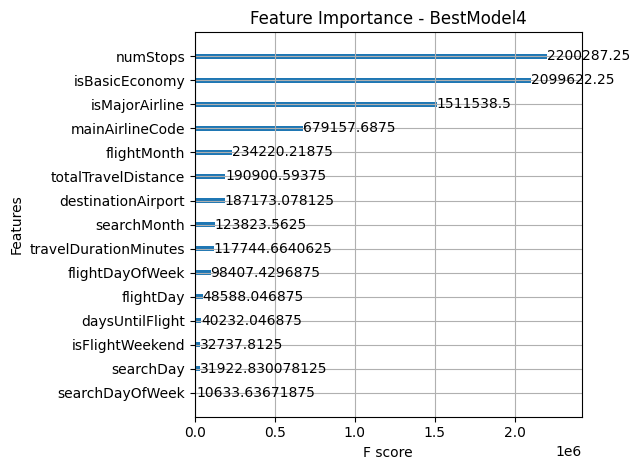

In [92]:

plt.figure(figsize=(10, 6))
plot_importance(best_model4, importance_type='gain')
plt.title("Feature Importance - BestModel4")
plt.tight_layout()
plt.show()


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625037 entries, 0 to 5625036
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   destinationAirport     int64  
 1   isBasicEconomy         int64  
 2   baseFare               float64
 3   totalTravelDistance    float64
 4   daysUntilFlight        int64  
 5   numStops               int64  
 6   mainAirlineCode        int64  
 7   travelDurationMinutes  int64  
 8   searchDayOfWeek        int32  
 9   flightDayOfWeek        int32  
 10  searchMonth            int32  
 11  flightMonth            int32  
 12  searchDay              int32  
 13  flightDay              int32  
 14  searchYear             int32  
 15  flightYear             int32  
 16  isSearchWeekend        int64  
 17  isFlightWeekend        int64  
 18  isMajorAirline         int64  
dtypes: float64(2), int32(8), int64(9)
memory usage: 643.7 MB


In [118]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

manual_input = {
    "numStops": 3,
    "isBasicEconomy": 1,
    "isMajorAirline": 1,
    "mainAirlineCode": 4,               #  Delta
    "flightMonth": 4,
    "totalTravelDistance": 4201.0,
    "destinationAirport": 8,
    "searchMonth": 3,
    "travelDurationMinutes": 624,
    "flightDayOfWeek": 2,                 
    "flightDay": 1,
    "daysUntilFlight": 4,
    "isFlightWeekend": 0,
    "searchDay": 28,
    "searchDayOfWeek": 4,               
}

manual_df = manual_df[X_best4.columns]  

# Now you can predict
manual_pred = best_model4.predict(manual_df)

print(f"Predicted baseFare: ${manual_pred[0]:.2f}")

Predicted baseFare: $305.44


In [113]:
import copy

# Create two versions of the same input
eco_1 = copy.deepcopy(manual_df)
eco_0 = copy.deepcopy(manual_df)

eco_1['isBasicEconomy'] = 1
eco_0['isBasicEconomy'] = 0

pred_1 = best_model4.predict(eco_1)[0]
pred_0 = best_model4.predict(eco_0)[0]

print(f"🟡 isBasicEconomy = 1 ➤ Predicted fare: ${pred_1:.2f}")
print(f"🟢 isBasicEconomy = 0 ➤ Predicted fare: ${pred_0:.2f}")
print(f"🔁 Difference: ${abs(pred_1 - pred_0):.2f}")


🟡 isBasicEconomy = 1 ➤ Predicted fare: $305.44
🟢 isBasicEconomy = 0 ➤ Predicted fare: $432.79
🔁 Difference: $127.35


In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import optuna
from xgboost import XGBRegressor

# 1. Drop unwanted features + target separation
X_best5 = df.drop(columns=[
    'baseFare', 
    'totalTravelDistance', 
    'mainAirlineCode', 
    'travelDurationMinutes', 
    'isMajorAirline'
])
y_best5 = df['baseFare']

# 2. Train/test split
X_best5_train, X_best5_test, y_best5_train, y_best5_test = train_test_split(
    X_best5, y_best5, test_size=0.2, random_state=42, shuffle=True
)

# 3. Define Optuna objective function
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 400, 600, step=50),
        "max_depth": trial.suggest_int("max_depth", 8, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.05, 0.15),
        "subsample": trial.suggest_float("subsample", 0.9, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.8, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 3),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
    }

    model = XGBRegressor(**params, random_state=42)
    model.fit(X_best5_train, y_best5_train)
    y_pred = model.predict(X_best5_test)
    rmse = np.sqrt(mean_squared_error(y_best5_test, y_pred))
    return rmse

# 4. Run optimization
study5 = optuna.create_study(direction="minimize")
study5.optimize(objective, n_trials=30)

# 5. Train final model with best params
best_params5 = study5.best_params
print(f"✅ BestModel5 Parameters: {best_params5}")

best_model5 = XGBRegressor(**best_params5, random_state=42)
best_model5.fit(X_best5_train, y_best5_train)

# 6. Evaluate
y_best5_pred = best_model5.predict(X_best5_test)
best5_rmse = np.sqrt(mean_squared_error(y_best5_test, y_best5_pred))
best5_r2 = r2_score(y_best5_test, y_best5_pred)

print("\n✅ Final BestModel5 (without totalTravelDistance, mainAirlineCode, travelDurationMinutes, isMajorAirline)")
print(f"📉 RMSE: {best5_rmse:.2f}")
print(f"📈 R² Score: {best5_r2:.4f}")


[I 2025-03-27 20:56:20,807] A new study created in memory with name: no-name-12317f3e-30ec-4d6c-a371-d9ed60906547
[I 2025-03-27 20:57:19,780] Trial 0 finished with value: 98.25495628157286 and parameters: {'n_estimators': 600, 'max_depth': 10, 'learning_rate': 0.14414307954117303, 'subsample': 0.975175384985966, 'colsample_bytree': 0.9525071003150849, 'gamma': 1.7589042982547016, 'reg_alpha': 1.1584102920552852, 'reg_lambda': 0.18812064051245692}. Best is trial 0 with value: 98.25495628157286.
[I 2025-03-27 20:58:04,161] Trial 1 finished with value: 98.35717501260451 and parameters: {'n_estimators': 600, 'max_depth': 8, 'learning_rate': 0.1463881965274028, 'subsample': 0.9525830466276526, 'colsample_bytree': 0.9013971576311814, 'gamma': 0.39587231219218455, 'reg_alpha': 3.8833207526683573, 'reg_lambda': 3.4283176725927325}. Best is trial 0 with value: 98.25495628157286.
[I 2025-03-27 20:58:54,307] Trial 2 finished with value: 98.18413271217439 and parameters: {'n_estimators': 600, 'max

✅ BestModel5 Parameters: {'n_estimators': 500, 'max_depth': 12, 'learning_rate': 0.051176432245436373, 'subsample': 0.9833668961814138, 'colsample_bytree': 0.8291958561659737, 'gamma': 2.9036989866037177, 'reg_alpha': 0.011141331765775586, 'reg_lambda': 2.186279797116544}

✅ Final BestModel5 (without totalTravelDistance, mainAirlineCode, travelDurationMinutes, isMajorAirline)
📉 RMSE: 97.96
📈 R² Score: 0.4837


<Figure size 2000x600 with 0 Axes>

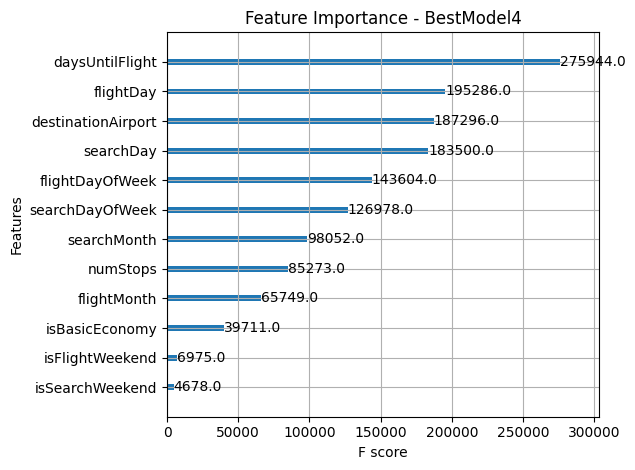

In [173]:
plt.figure(figsize=(20, 6))
plot_importance(best_model5, importance_type='weight')
plt.title("Feature Importance - BestModel4")
plt.tight_layout()
plt.show()

In [139]:
# Assuming you have best_model1 to best_model5 and their respective X_test and y_test
models = {
    "BestModel1": (best_model, X_best_test, y_best_test),
    "BestModel2": (best_model2, X_best2_test, y_best2_test),
    "BestModel3": (best_model3, X_best3_test, y_best3_test),
    "BestModel4": (best_model4, X_best4_test, y_best4_test),
    "BestModel5": (best_model5, X_best5_test, y_best5_test),
}

# Print absolute errors for each model
for name, (model, X_test, y_test) in models.items():
    y_pred = model.predict(X_test)
    absolute_errors = np.abs(y_test - y_pred)

    # print(f"\n🔍 {name} - Absolute Errors:")
    # print(absolute_errors)

    # Optionally print summary
    print(f"📊 {name} Summary:")
    print(f"Mean: {np.mean(absolute_errors):.2f}, Min: {np.min(absolute_errors):.2f}, Max: {np.max(absolute_errors):.2f}")


📊 BestModel1 Summary:
Mean: 26.56, Min: 0.00, Max: 2217.74
📊 BestModel2 Summary:
Mean: 26.66, Min: 0.00, Max: 2224.07
📊 BestModel3 Summary:
Mean: 47.51, Min: 0.00, Max: 2203.93
📊 BestModel4 Summary:
Mean: 26.10, Min: 0.00, Max: 2225.92
📊 BestModel5 Summary:
Mean: 62.73, Min: 0.00, Max: 2164.55


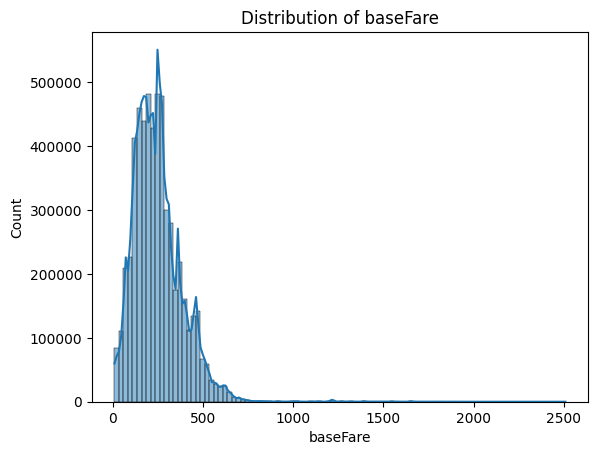

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(y_best4, bins=100, kde=True)
plt.title("Distribution of baseFare")
plt.show()


In [145]:
upper_bound = y_best4.quantile(0.995)  # 99.5th percentile
print(f"📈 99.5th Percentile Upper Bound: {upper_bound:.2f}")


📈 99.5th Percentile Upper Bound: 682.79


In [188]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import optuna

# 1. Drop target and unwanted features
X_best6 = df.drop(columns=['baseFare', 'searchYear', 'flightYear'])
y_best6 = df['baseFare']

# 2. Train/Test split
X_best6_train, X_best6_test, y_best6_train, y_best6_test = train_test_split(
    X_best6, y_best6, test_size=0.2, random_state=42, shuffle=True
)

# 3. Apply 99.5th percentile clipping to training labels
upper_bound_995 = y_best6.quantile(0.995)
print(f"📊 99.5th Percentile Upper Bound (for training): {upper_bound_995:.2f}")
y_best6_train_clipped = y_best6_train.clip(upper=upper_bound_995)

# 4. Define Optuna objective
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 400, 600, step=50),
        "max_depth": trial.suggest_int("max_depth", 8, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.05, 0.15),
        "subsample": trial.suggest_float("subsample", 0.9, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.8, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 3),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
    }
    model = XGBRegressor(**params, random_state=42)
    model.fit(X_best6_train, y_best6_train_clipped)
    y_pred = model.predict(X_best6_test)
    y_pred = np.minimum(y_pred, upper_bound_995)
    return mean_absolute_error(y_best6_test, y_pred)

# 5. Optimize with Optuna
study6 = optuna.create_study(direction="minimize")
study6.optimize(objective, n_trials=30)

# 6. Train final model with best params
best_params6 = study6.best_params
print(f"\n✅ BestModel6 Parameters (no year features): {best_params6}")

best_model6 = XGBRegressor(**best_params6, random_state=42)
best_model6.fit(X_best6_train, y_best6_train_clipped)

# 7. Predict and evaluate
y_pred_best6 = best_model6.predict(X_best6_test)
y_pred_best6_capped = np.minimum(y_pred_best6, upper_bound_995)
mae_best6 = mean_absolute_error(y_best6_test, y_pred_best6_capped)
print(f"\n📏 BestModel6 Final MAE (no year features): {mae_best6:.2f}")


[I 2025-03-30 22:04:15,046] A new study created in memory with name: no-name-76795662-255a-496e-a59c-26e3566fc1c6


📊 99.5th Percentile Upper Bound (for training): 682.79


[I 2025-03-30 22:05:03,964] Trial 0 finished with value: 29.314066825103396 and parameters: {'n_estimators': 400, 'max_depth': 12, 'learning_rate': 0.09497817823796417, 'subsample': 0.9360995043195194, 'colsample_bytree': 0.8009330649460789, 'gamma': 0.7208295471762896, 'reg_alpha': 3.0330747251845884, 'reg_lambda': 4.487659888606085}. Best is trial 0 with value: 29.314066825103396.
[I 2025-03-30 22:05:44,091] Trial 1 finished with value: 36.49742796865868 and parameters: {'n_estimators': 600, 'max_depth': 8, 'learning_rate': 0.08708104618168719, 'subsample': 0.9071680944931038, 'colsample_bytree': 0.8059596273908711, 'gamma': 1.134334887201236, 'reg_alpha': 1.898410793116589, 'reg_lambda': 0.619193914842765}. Best is trial 0 with value: 29.314066825103396.
[I 2025-03-30 22:06:24,040] Trial 2 finished with value: 31.551560177299354 and parameters: {'n_estimators': 450, 'max_depth': 10, 'learning_rate': 0.1167013765169438, 'subsample': 0.909795168848815, 'colsample_bytree': 0.9466132900


✅ BestModel6 Parameters (no year features): {'n_estimators': 500, 'max_depth': 12, 'learning_rate': 0.14164300155872644, 'subsample': 0.9735343413762028, 'colsample_bytree': 0.9579660339695097, 'gamma': 0.4107075414153295, 'reg_alpha': 2.170229896610801, 'reg_lambda': 1.7506536817120544}

📏 BestModel6 Final MAE (no year features): 26.68


In [189]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Calculate 99.5th percentile once
upper_bound = df['baseFare'].quantile(0.995)
print(f"Clipping predictions to 99.5th percentile: {upper_bound:.2f}\n")

# Collect predictions (assumes all y_test sets are aligned with their corresponding models)
mae_results = {}

# BestModel1
#y_pred_1_capped = np.minimum(y_best1_pred, upper_bound)
#mae_results['BestModel1'] = mean_absolute_error(y_best1_test, y_pred_1_capped)

# BestModel2
y_pred_2_capped = np.minimum(y_best2_pred, upper_bound)
mae_results['BestModel2'] = mean_absolute_error(y_best2_test, y_pred_2_capped)

# BestModel3
y_pred_3_capped = np.minimum(y_best3_pred, upper_bound)
mae_results['BestModel3'] = mean_absolute_error(y_best3_test, y_pred_3_capped)

# BestModel4
y_pred_4_capped = np.minimum(y_best4_pred, upper_bound)
mae_results['BestModel4'] = mean_absolute_error(y_best4_test, y_pred_4_capped)

# BestModel5
y_pred_5_capped = np.minimum(y_best5_pred, upper_bound)
mae_results['BestModel5'] = mean_absolute_error(y_best5_test, y_pred_5_capped)

# BestModel6 (already capped during prediction)
mae_results['BestModel6'] = mean_absolute_error(y_best6_test, y_pred_best6_capped)

# Print nicely
print("MAE Summary (Clipped at 99.5th Percentile):\n")
for model_name, mae in mae_results.items():
    print(f"{model_name}: {mae:.2f}")


Clipping predictions to 99.5th percentile: 682.79

MAE Summary (Clipped at 99.5th Percentile):

BestModel2: 27.44
BestModel3: 48.19
BestModel4: 26.87
BestModel5: 62.73
BestModel6: 26.68


In [195]:
import pandas as pd

# Replace these example values with real ones when testing
manual_input_data = {
    'destinationAirport': 8,        
    'isBasicEconomy': 0,                  
    'totalTravelDistance': 761.6,        
    'daysUntilFlight': 7,                
    'numStops': 1,                        
    'mainAirlineCode': 4,             
    'travelDurationMinutes': 129.21,         
    'searchDayOfWeek': 6,                 
    'flightDayOfWeek': 6,
    'searchMonth': 3,
    'flightMonth': 4,
    'searchDay': 30,
    'flightDay': 9,
    'isSearchWeekend': 1,                 
    'isFlightWeekend': 0,
    'isMajorAirline': 1                  
}

# Convert to DataFrame
manual_df = pd.DataFrame([manual_input_data])

# If model expects raw features (no scaler/encoder needed)
prediction = best_model6.predict(manual_df)

print(f" Predicted baseFare: {prediction[0]:.2f}")

 Predicted baseFare: 298.85


In [196]:
print("📦 Feature names and data types used in best_model6:")
print(X_best6_train.dtypes)


📦 Feature names and data types used in best_model6:
destinationAirport         int64
isBasicEconomy             int64
totalTravelDistance      float64
daysUntilFlight            int64
numStops                   int64
mainAirlineCode            int64
travelDurationMinutes      int64
searchDayOfWeek            int32
flightDayOfWeek            int32
searchMonth                int32
flightMonth                int32
searchDay                  int32
flightDay                  int32
isSearchWeekend            int64
isFlightWeekend            int64
isMajorAirline             int64
dtype: object


In [197]:
import joblib
joblib.dump(best_model6, "best_model6.pkl")
print("✅ best_model6 saved as best_model6.pkl")


✅ best_model6 saved as best_model6.pkl
